<h2 style="color:Tomato;">Data Science course of DHDK university program - Academic year 2021-2022</h2>

<h1>D_Sign_Data Notebook</h1>
<h3><i>Descriptive document of the final project work</i></h3>

<em>Camila Oliveira, Anita Vishinskaite, Marida Di Lembo</em>

<h2>The Cotext</h2>

<blockquote>The goal of the project is to develop a software that enables one to process data stored in different formats and to upload them into two distinct databases to query these databases simultaneously according to predefined operations. </blockquote>
<br>
<p>We have been analysing the project requirement and the data provided and assigned a different task to each of us for the development activity</p>
<p>Basically we splitted in two groups: one focused on the relational database and the other on the graph</p>
<em>Initially the group was composed of four member, at the end we remained in three</em>
The tasks were developed in the following way:
<ul>
<li>Camila Oliveira: Relational Processor, Relational Data Processor and Relational Query Processor.
<li>Anita Vishinskaite: Triple Store Processor, Triple Store Data Processor.
<li>Marida Di Lembo: Triple Store Query Processor, Generic Query Data Processor and Statistics.
<ul>


<h3>Tools and collaboration environment</h3>

<p>First of all we have been setting up our Github Repository: <a href="https://github.com/lelax/D_Sign_Data">https://github.com/lelax/D_Sign_Data</a> and shared access to it in order to be able to upload the material and syncronize it in real time.</p>
<p>Then we have been also evaluating between Jupyter and Google Colab and we finally decided to use Jupyter for the documentation report.</p>

<h4><em>What you will find in the repository</em></h4>

<ul>
    <li>A folder called <b>import</b> where we have copied the .csv and .json files provided</li>
    <li>A folder called <b>URIref</b> where we have created additional classes</li>
    <li>The <b>impl.py</b> Python file, where all the relational data base has been defined</li>
    <li>The <b>graph_01.py</b> Python file, where all the graph data base has been defined</li>
    <li>A file for the SPARQL queries</li>
</ul>

<h2>The Relational Database</h2>

In the <em>impl.py</em> file we have been developing the code for the creation of a relational database of the data model requested and the data provided.

The libraries imported and used are the following:

In [5]:
import pandas as pd
import sqlite3
from sqlite3 import connect
from pandas import read_csv
from pandas import Series
from pandas import read_sql
from pandas import read_json
from pandas import DataFrame
from csv import reader
from pandas import merge
from json import dump
from csv import reader

<h2>UML of data model classes</h2>

The following classes were created as well as their methods as specified in the model:
<ul>
<li>Identifiable Entity: being the super class
<li>Person
<li>Publication
<li>Venue
<li>Organization
<li>Journal Article
<li>Book Chapter
<li>Proceedings Paper
<li>Journal
<li>Book
<li>Proceedings

<h2>Class Relational Processor</h2>

From the Relational Processor class the attributes getDbPath and setDbPath can be used to return the path of the database and enable a new database path. Those are used in the following way:

In [ ]:
rel_path = "relational.db"
rel_dp = RelationalDataProcessor(rel_path)

<em>It's important to use them in the order described.</em>

<h3>Class Relational Data Processor</h3>

In this class you'll be able to find the uploadData method in which allows one to upload data, either in CSV or JSON file, into the database previously created with the methods from the Relational Processor class. And can be used as follows:

In [ ]:
rel_dp.uploadData("relational_publications.csv")

rel_dp.uploadData("relational_other_data.json")

After the database path is created and data is uploaded the following tables are created in the relational database:
<ul>
<li>Authors
<li>Venues Id
<li>References
<li>Publishers
<li>Publications
<li>Journal Articles
<li>Organization
<li>Journals
<li>Books
<li>Proceedings


<h3>Class Relational Query Processor</h3>

In this class, one is able to query information from the database created according to the follwing methods:
<ul>
<li>getPublicationsPublishedinYear
<li>getPublicationsByAuthorId
<li>getMostCitedPublication
<li>getMostCitedVenue
<li>getVenuesByPublisherId
<li>getPublicationInVenue
<li>getJournalArticleInIssue
<li>getJournalArticlesInVolume
<li>getJournalArticlesInJournal
<li>getProceedingsByEvent
<li>getPublicationAuthors
<li>getPublicationByAuthorName
<li>getDistinctPublisherOfPublications

<h2>The Graph workflow</h2>

The first step of the creation of the data frame based on the RDF triplestore language has been the definition of all the classes, with attributes and relations. For doing this we needed to import the <em>Graph</em> and the <em>URIRef</em> components from <b>RDF library</b>. They allow to setup an empty graph ready to be populated.

In [ ]:
from rdflib import Graph

my_graph = Graph()

from rdflib import URIRef

Then basically looking at the UML model provided we have been listing all the classes required for the resources and assigning for each class a URI, using the resorces of schema.org and Fabio:

In [ ]:
# classes of resources
Person = URIRef("https://schema.org/Person")
JournalArticle = URIRef("https://schema.org/ScholarlyArticle")
BookChapter = URIRef("https://schema.org/Chapter")
ProceedingsPaper = URIRef("http://purl.org/spar/fabio/ProceedingsPaper")
Journal = URIRef("https://schema.org/Periodical")
Book = URIRef("https://schema.org/Book")
Proceedings = URIRef("http://purl.org/spar/fabio/AcademicProceedings")
Venue = URIRef("http://purl.org/dc/elements/1.1/source")
Organization = URIRef("https://schema.org/Organization")

Same process has been done for attributes and relations among classes:

In [ ]:
# attributes related to classes
doi = URIRef("https://schema.org/identifier")
publicationYear = URIRef("https://schema.org/datePublished")
title = URIRef("http://purl.org/dc/terms/title")
issue = URIRef("https://schema.org/issueNumber")
volume = URIRef("https://schema.org/volumeNumber")
identifier = URIRef("https://schema.org/identifier")
name = URIRef("https://schema.org/name")
event = URIRef("https://schema.org/Event")
chapterNumber = URIRef("https://github.com/lelax/D_Sign_Data/blob/main/URIRef/chapterNumber")
givenName = URIRef ("https://schema.org/givenName")
familyName = URIRef ("https://schema.org/familyName")

# relations among classes
publicationVenue = URIRef("https://schema.org/isPartOf")
publisher = URIRef ("https://schema.org/publishedBy")
author = URIRef ("http://purl.org/saws/ontology#isWrittenBy")
cites = URIRef ("http://purl.org/spar/cito/isCitedBy")

Then we have imported also the constructor <em>Literal</em> for the string, number and boolean variables to be used as attributes of the triples.

At this point we could start the implementation of the <b>RDF Triplestore</b> and start testing and querying the data provided in the <em>graph_publication.csv</em> file.

<h1>Statistics</h1>

Here I'm analysing the data provided for the project. Starting from the csv file <em>relational_publications.csv</em> with and without the <em>keep_default_na=False</em> I've been running the .info method to see the description of the dataframe.

![title](Statistics_pictures/info.method.jpg)

<h2>Visualizing data </h2>

Pandas makes available a list of methods to visualize dataframes that can be read and interpreted in order to understand and analyze set of data directly by reading it from a file or a dataframe.

The <em>.describe</em> method is a powerful tool which include a lot of predefined statistical computations.

In [11]:
from pandas import read_csv
import pandas as pd

md_publications_csv = pd.read_csv("Statistics_pictures/relational_publications.csv")

md_publications_csv.describe(include="all")


,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
count,500,500,500,500.000000,347,443,22.000000,498,498,498,0.0
unique,500,500,2,NaN,31,149,NaN,295,2,32,NaN
top,doi:10.1162/qss_a_00023,"Opencitations, An Infrastructure Organization ...",journal-article,NaN,1,11,NaN,Scientometrics,journal,crossref:297,NaN
freq,1,1,478,NaN,69,29,NaN,50,478,145,NaN
mean,NaN,NaN,NaN,2019.558000,NaN,NaN,0.909091,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.512353,NaN,NaN,0.294245,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2014.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2020.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


By looking at the result of the <em>.describe</em> method, including all, we have a complete overview about different types of analytical statistics. We can at a first sight see that there are a lot of NaN (Not a Number) values in the dataframe, because for certain operations strings can not be aritmetically computed.

For each value we have aggregate information which are indicated by the index composed by strings of statistical dimensions predefined by Pandas:

<ul>
    <li><b>count:</b> how many non null values are specified in each column, that we also see with the .info method;</li>
    <li><b>unique:</b> how many unique values are specified in the colums (avoiding the count of repeated values). Here we can see that the in the dataframe each record has a unique id and title, while all the other values are in commons to different items. By looking at the type unique value we can see that there are only two types of publications and venues;</li>
    <li><b>top:</b> the values that appear most often in the dataframe, here for example we can see the top publication vanue "Scientometrics" is the one with has the largest amount of publications; as well ad the top type which is journal article;</li>
    <li><b>freq:</b> the number of repeated values for each colum;</li>
    <li><b>mean:</b> the mean on the integer values;</li>
    <li><b>std:</b> the standard deviation;</li>
    <li><b>min and max:</b> minimum and macimum values, we can directly see in the min cell of the publication year colum the most ancient publication and most recent in the max;</li>
    <li><b>25%, 50%, 75%:</b> Usefull to understand the distribution of data.</li>
</ul>

<h3>Table visualization</h3>

We can directly query on the table and receive results in tabular mode. The following table is the result of a query with looks for a specific record by filering for a specific id:

In [47]:
md_publications_csv.query('id == "doi:10.1162/qss_a_00023"')

,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
0,doi:10.1162/qss_a_00023,"Opencitations, An Infrastructure Organization ...",journal-article,2020,1,1,NaN,Quantitative Science Studies,journal,crossref:281,NaN


We can get additional selected information, like looking for alla the pubblications which are present in the Scientometrics Venue:

In [46]:
md_publications_csv.query('publication_venue == "Scientometrics"')

,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
1,doi:10.1007/s11192-019-03217-6,"Software Review: Coci, The Opencitations Index...",journal-article,2019,2,121,NaN,Scientometrics,journal,crossref:297,NaN
2,doi:10.1007/s11192-019-03311-9,Nine Million Book Items And Eleven Million Cit...,journal-article,2019,2,122,NaN,Scientometrics,journal,crossref:297,NaN
6,doi:10.1007/s11192-020-03397-6,The Practice Of Self-Citations: A Longitudinal...,journal-article,2020,1,123,NaN,Scientometrics,journal,crossref:297,NaN
12,doi:10.1007/s11192-020-03690-4,"Google Scholar, Microsoft Academic, Scopus, Di...",journal-article,2020,1,126,NaN,Scientometrics,journal,crossref:297,NaN
16,doi:10.1007/s11192-021-04079-7,Universal And Specific Features Of Ukrainian E...,journal-article,2021,9,126,NaN,Scientometrics,journal,crossref:297,NaN
19,doi:10.1007/s11192-021-04097-5,A Qualitative And Quantitative Analysis Of Ope...,journal-article,2021,10,126,NaN,Scientometrics,journal,crossref:297,NaN
41,doi:10.1007/s11192-016-1879-4,A Bibliometric Analysis To Illustrate The Role...,journal-article,2016,1,107,NaN,Scientometrics,journal,crossref:297,NaN
42,doi:10.1007/s11192-016-1971-9,Quantifying The Changing Role Of Past Publicat...,journal-article,2016,2,108,NaN,Scientometrics,journal,crossref:297,NaN
43,doi:10.1007/s11192-016-2071-6,Mapping And Classification Of Agriculture In W...,journal-article,2016,2,109,NaN,Scientometrics,journal,crossref:297,NaN
44,doi:10.1007/s11192-016-2132-x,Measuring The Match Between Evaluators And Eva...,journal-article,2016,3,109,NaN,Scientometrics,journal,crossref:297,NaN


We can look for all the book chapters in the dataframe:

In [49]:
md_publications_csv.query('type == "book-chapter"')

,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
8,doi:10.1007/978-3-030-61244-3_16,Researchflow: Understanding The Knowledge Flow...,book-chapter,2020,NaN,NaN,1.0,Lecture Notes In Computer Science - Knowledge ...,book,crossref:297,NaN
9,doi:10.1007/978-3-030-61244-3_6,Ontologies Supporting Research-Related Informa...,book-chapter,2020,NaN,NaN,1.0,Lecture Notes In Computer Science - Knowledge ...,book,crossref:297,NaN
10,doi:10.1007/978-3-030-54956-5_2,Question Answering On Scholarly Knowledge Graphs,book-chapter,2020,NaN,NaN,1.0,Digital Libraries For Open Knowledge - Lecture...,book,crossref:297,NaN
11,doi:10.1007/978-3-030-55814-7_15,Dingo: An Ontology For Projects And Grants Lin...,book-chapter,2020,NaN,NaN,1.0,"Adbis, Tpdl And Eda 2020 Common Workshops And ...",book,crossref:297,NaN
13,doi:10.1007/978-3-030-62466-8_28,The Opencitations Data Model,book-chapter,2020,NaN,NaN,1.0,Lecture Notes In Computer Science - The Semant...,book,crossref:297,NaN
15,doi:10.1007/978-3-030-77385-4_37,Kgbench: A Collection Of Knowledge Graph Datas...,book-chapter,2021,NaN,NaN,1.0,The Semantic Web - Lecture Notes In Computer S...,book,crossref:297,NaN
20,doi:10.1007/978-3-030-84825-5_11,Lobd: Linked Data Dashboard For Marine Biodive...,book-chapter,2021,NaN,NaN,1.0,Communications In Computer And Information Sci...,book,crossref:297,NaN
26,doi:10.1007/978-3-030-16187-3_20,Using The Spar Ontology Network To Represent T...,book-chapter,2019,NaN,NaN,1.0,Advances In Intelligent Systems And Computing ...,book,crossref:297,NaN
29,doi:10.1007/978-3-030-59194-6_37,Construction And Leverage Scientific Knowledge...,book-chapter,2020,NaN,NaN,1.0,Systems And Information Sciences - Advances In...,book,crossref:297,NaN
30,doi:10.1007/978-3-030-61244-3_7,A Unified Nanopublication Model For Effective ...,book-chapter,2020,NaN,NaN,1.0,Lecture Notes In Computer Science - Knowledge ...,book,crossref:297,NaN


We can combine even more than one filter to refine the result. Here I'm looking for all the book chapters which have been published in 2018:

In [52]:
md_publications_csv.query('type == "book-chapter"'and 'publication_year == 2018')

,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
54,doi:10.1007/s11192-017-2636-z,The Presence Of The Encyclicals In Web Of Scie...,journal-article,2018,1,115,NaN,Scientometrics,journal,crossref:297,NaN
55,doi:10.1007/s11192-018-2651-8,Bibliometric Analysis To Identify An Emerging ...,journal-article,2018,3,115,NaN,Scientometrics,journal,crossref:297,NaN
56,doi:10.1007/s11192-018-2705-y,A Look Back Over The Past 40 Years Of Female E...,journal-article,2018,2,115,NaN,Scientometrics,journal,crossref:297,NaN
57,doi:10.1007/s11192-018-2734-6,Discontinuities In Citation Relations Among Jo...,journal-article,2018,1,116,NaN,Scientometrics,journal,crossref:297,NaN
58,doi:10.1007/s11192-018-2740-8,An Eu Without The Uk: Mapping The Uk’S Changin...,journal-article,2018,3,115,NaN,Scientometrics,journal,crossref:297,NaN
...,...,...,...,...,...,...,...,...,...,...,...
337,doi:10.3390/antibiotics7040102,Bibliometric Analysis Of Global Research On Cl...,journal-article,2018,4,7,NaN,Antibiotics,journal,crossref:1968,NaN
339,doi:10.1590/2318-08892018000300001,Análisis De Co-Palabras Aplicado A Los Artícul...,journal-article,2018,3,30,NaN,Transinformação,journal,crossref:530,NaN
344,doi:10.1007/s00500-018-3168-z,Twenty Years Of Soft Computing: A Bibliometric...,journal-article,2018,5,23,NaN,Soft Computing,journal,crossref:297,NaN
353,doi:10.3390/ijerph16010029,Emerging Trends And New Developments In Disast...,journal-article,2018,1,16,NaN,International Journal Of Environmental Researc...,journal,crossref:1968,NaN


<h3>Chart visualization</h3>

Pandas has a set of predefined methods for chart visualization.
They are used to support data analysis and we have selected few for representing our data and achieve a better knowledge on its distribution.

We can create several plot charts simply calling the method .plot and the kind for each column of our data table.

For example we take the column "type" and we can see different kind of plots:

<AxesSubplot:>

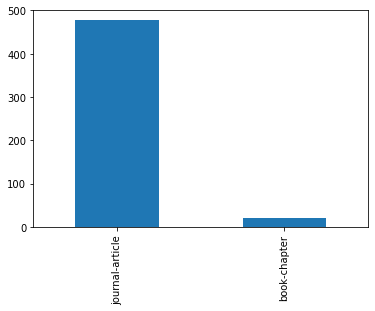

In [15]:
type = md_publications_csv["type"].value_counts()
type

type.plot(kind="bar")

<AxesSubplot:>

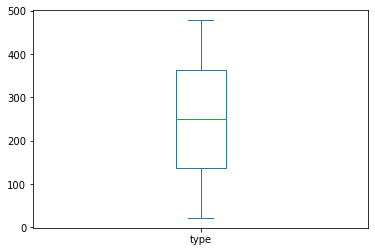

In [38]:
type = md_publications_csv["type"].value_counts()
type

type.plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

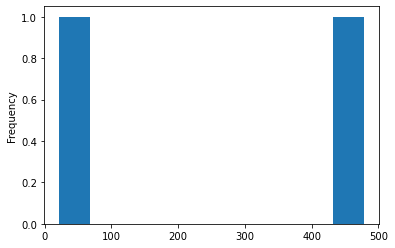

In [39]:
type = md_publications_csv["type"].value_counts()
type

type.plot(kind="hist")

<AxesSubplot:>

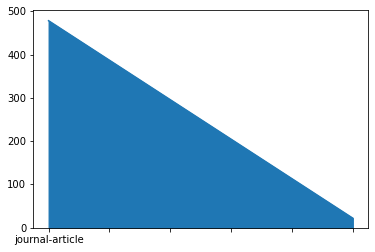

In [40]:
type = md_publications_csv["type"].value_counts()
type

type.plot(kind="area")

<AxesSubplot:ylabel='type'>

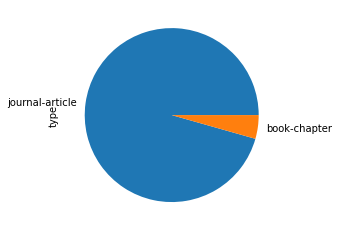

In [41]:
type = md_publications_csv["type"].value_counts()
type

type.plot(kind="pie")

<h4>Order, sort and view as chart</h4>

In the following example we are using the <em>.value_counts</em> method to view the best venues of the dataframe and then we visualize it also in a barhplot chart.

In [21]:
best_venues = md_publications_csv["publication_venue"].value_counts()[:10]
best_venues

Scientometrics                                                       50
Sustainability                                                       30
International Journal Of Environmental Research And Public Health    14
Journal Of Informetrics                                               9
Journal Of Cleaner Production                                         9
The Canadian Journal Of Chemical Engineering                          8
Energies                                                              8
Technological Forecasting And Social Change                           6
Journal Of The Association For Information Science And Technology     6
Plos One                                                              5
Name: publication_venue, dtype: int64

<AxesSubplot:>

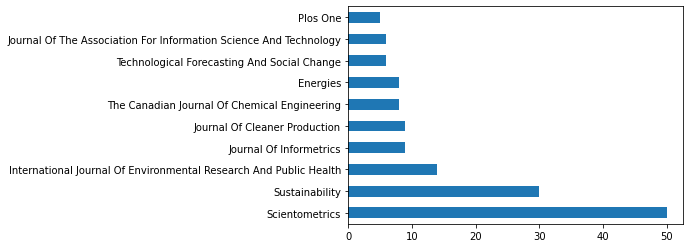

In [22]:
best_venues.plot(kind="barh")

<h4>Visualizing from the perspective of the publication per year</h4>

Similarly to the best_venue we can act on all the other values, i.e. the publication year. Additionally to the count we can also use the <em>.sort_index</em> to reorder the table obtained by the chronological order, year per year. In this way the barplot will appear much more clear and intuitive to visualize:

In [24]:
publications_per_year = md_publications_csv["publication_year"].value_counts()
publications_per_year

2021    209
2019    109
2018     83
2020     56
2017     24
2016     15
2014      3
2015      1
Name: publication_year, dtype: int64

In [25]:
publications_per_year_sorted = publications_per_year.sort_index()
publications_per_year_sorted

2014      3
2015      1
2016     15
2017     24
2018     83
2019    109
2020     56
2021    209
Name: publication_year, dtype: int64

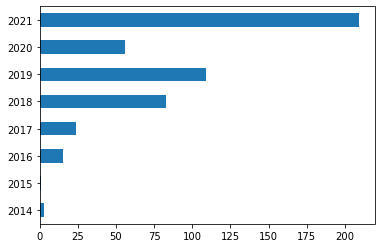

In [31]:
publications_per_year_sorted.plot.barh(stacked=True);

We can change the kind of chart by calling other methods:

<AxesSubplot:>

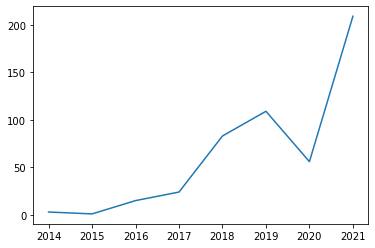

In [26]:
publications_per_year_sorted.plot()

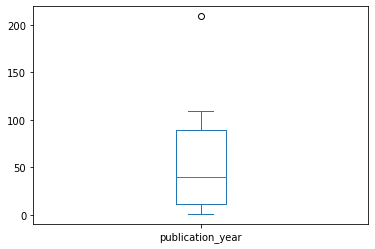

In [29]:
publications_per_year_sorted.plot.box();

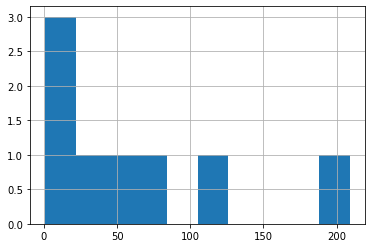

In [30]:
publications_per_year_sorted.hist();

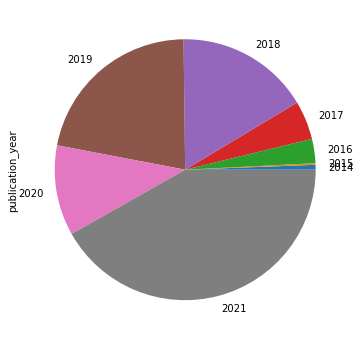

In [32]:
publications_per_year_sorted.plot.pie(figsize=(6, 6));

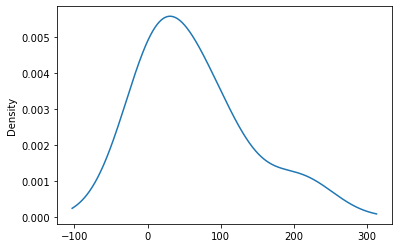

In [35]:
publications_per_year_sorted.plot.kde();

<em>Depending on the kind of data to be visualized it's important to select the right kind of chart.</em>